In [1]:
import os
import pandas as pd
import numpy as np
import random
import math
from decimal import Decimal
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def levenshtein(seq1, seq2):  
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [3]:
def compare(a, b): 
    # Count number of identities
    num = 0
    # Set length for the shorter sequence 
    if len(a) < len(b):
        L = len(a)
    else:
        L = len(b)
        
    if len(a)!=len(b):
        print("Length of the two sequences is different!")
        
    for i in range(L):
        # Add 1 to the distance if these two characters are not equal
        if a[i] == b[i]:
            num += 1
    identity = num/L
    # Return the final count of differences
    return identity

In [4]:
def levenshteinPerProt(seq1, seq2): 

    # Set length for the shorter sequence 
    if len(seq1) < len(seq2):
        L = len(seq1)
    else:
        L = len(seq2)
        
    if len(seq1)!=len(seq2):
        print("Length of the two sequences is different!")
    
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    dist = (matrix[size_x - 1, size_y - 1])
    distPerRes = dist/L
    # Return the final count of differences
    return distPerRes

In [5]:
def addValues(ax):
    values = []
    for i in ax.patches: 
        values.append(i.get_height())
    
    total = sum(values)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        #ax.text(i.get_x()-.05, i.get_height()+.1, str(round((i.get_height()/total)*100, 2))+'%', fontsize=15)
        # ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')
        ax.text(i.get_x()+0.15, i.get_height(), str(round(i.get_height(), 4)), ha='center', va='bottom', fontsize=9)

In [6]:
def plotIdentity(dfFull, c): 
    # Identity to Native sequence, Idea 1
    df = dfFull[['N_OptE', 'N_OptS', 'N_OptG','R_OptE', 'R_OptS', 'R_OptG', 'Rand']].copy()
    mean = df.mean()
    std = df.std()
    N = 7
    ind = np.arange(N) # the x locations for the groups

    ide, ax = plt.subplots()
    graph = ax.bar(ind, mean, color = c, yerr = std, capsize=2)

    # Add text for labels, title and axes ticks
    ax.set_ylabel('mean, r.u.')
    ax.set_title('Identity to Native sequence (Idea 1) '+model)
    ax.set_xticks(ind)
    ax.set_xticklabels(mean.index)

    addValues(ax)
    plt.show()
    
    return ide

In [7]:
def plotLevenstein(dfFull, c): 
    # Identity to Native sequence, Idea 1 
    df = dfFull[['N_OptE', 'N_OptS', 'N_OptG','R_OptE', 'R_OptS', 'R_OptG', 'Rand']].copy()
    mean = df.mean()
    std = df.std()
    N = 7
    ind = np.arange(N) # the x locations for the groups

    ide, ax = plt.subplots()
    graph = ax.bar(ind, mean, color = c, yerr = std, capsize=2)

    # Add text for labels, title and axes ticks
    ax.set_ylabel('mean, r.u.')
    ax.set_title('Levenshtein distance (per R) to Native sequence (Idea 1) '+model)
    ax.set_xticks(ind)
    ax.set_xticklabels(mean.index)

    addValues(ax)
    plt.show()
    
    return ide

In [8]:
def substractFrom1(value):
    nval = 1 - value
    return nval

In [9]:
def plotReverseLev(dfFull, c): 
    # Identity to Native sequence, Idea 1 
    df = dfFull[['N_OptE', 'N_OptS', 'N_OptG', 'R_OptE', 'R_OptS', 'R_OptG', 'Rand']].copy()
    df = df.applymap(substractFrom1)
    mean = df.mean()
    std = df.std()
    N = 7
    ind = np.arange(N) # the x locations for the groups

    ide, ax = plt.subplots()
    graph = ax.bar(ind, mean, color = c, yerr = std, capsize=2)

    # Add text for labels, title and axes ticks
    ax.set_ylabel('mean, r.u.')
    ax.set_title('Reversed Levenshtein distance (per R) to Native (Idea 1) '+model)
    ax.set_xticks(ind)
    ax.set_xticklabels(mean.index)

    addValues(ax)
    plt.show()
    
    return ide

In [17]:
path = 'C:/Kate/Bioinformatics/Diplom/'
os.chdir(path)

file = 'Lists.xlsx'
# Load data from excel
xf = pd.ExcelFile(file)    
dfNames = xf.parse('Set45')
#dfNames = xf.parse('Control10')

In [18]:
numprots = 45
runs = dfNames.Name[:numprots]
runs

0     1ucs
1     1utg
2     2zeq
3     2uwr
4     1gvp
5     1cdz
6     1bm8
7     3caf
8     1gh2
9     1bet
10    2ppn
11    3s0a
12    1buo
13    1dhn
14    1qto
15    1c44
16    1bgf
17    1msc
18    1bz4
19    1srv
20    4pa1
21    2ywx
22    1emr
23    4e2u
24    1c3g
25    1koe
26    1p7n
27    1cdy
28    1r8n
29    1is1
30    1mf7
31    3b02
32    3sh4
33    1rc9
34    1byi
35    1scz
36    4p9n
37    2cyg
38    1cem
39    1nd7
40    1o5t
41    3ux1
42    1dab
43    1cii
44    4moa
Name: Name, dtype: object

In [19]:
path = 'C:/Kate/Bioinformatics/Diplom/NewResults/'

In [23]:
# calc idetity and Levenstein distance to the Native patterns

model = 'B3_BE'

# Lists to hold the identity index
irand = []
ine = []
ins = []
inh = []
ire = []
irs = []
irh = []

# Lists to hold the Levenstein distance per residue
levrand = []
levne = []
levns = []
levnh = []
levre = []
levrs = []
levrh = []

counts = []
names = []
reps = []
natives = []

for count, name in enumerate(runs):
    os.chdir("C:/Kate/Bioinformatics/Diplom/"+model+"/")
    file = model+str(count)+'_'+name+'_Native0.xlsx'
    # Load data from excel
    xf = pd.ExcelFile(file)    
    dfResults = xf.parse('Results')
    natseq = dfResults.Sequence[0]
    
    repeats = 10 
    for n in range(repeats):

        counts.append(count)
        names.append(name)
        reps.append(n)
        natives.append(natseq)

        # # Load data from excel
        file = model+str(count)+'_'+name+'_Native'+str(n)+'.xlsx'
        xf = pd.ExcelFile(file)    
        dfResultsNat = xf.parse('Results')

        # Name the seuences from the results
        ne = dfResultsNat.Sequence[1]      # Sequence with optimized Energy, starting from native sequence
        ns = dfResultsNat.Sequence[2]      # Sequence with optimized Entropy, starting from native sequence
        nh = dfResultsNat.Sequence[3]      # Sequence with optimized Entalpy, starting from native sequence

        # Load results and protein sequences 
        file = model+str(count)+'_'+name+'_Random'+str(n)+'.xlsx'
        # Load spreadsheet
        xf = pd.ExcelFile(file)    
        # Load a sheet into a DataFrame
        dfResultsRand = xf.parse('Results')

        rand = dfResultsRand.Sequence[0]    # Random sequence
        re = dfResultsRand.Sequence[1]      # Sequence with optimized Energy, starting from random sequence
        rs = dfResultsRand.Sequence[2]      # Sequence with optimized Entropy, starting from random sequence
        rh = dfResultsRand.Sequence[3]      # Sequence with optimized Entalpy, starting from native sequence

        ine.append(compare(natseq, ne))
        ins.append(compare(natseq, ns))
        inh.append(compare(natseq, nh))
        ire.append(compare(natseq, re))
        irs.append(compare(natseq, rs))
        irh.append(compare(natseq, rh))
        irand.append(compare(natseq, rand))
        
        levne.append(levenshteinPerProt(natseq, ne))
        levns.append(levenshteinPerProt(natseq, ns))
        levnh.append(levenshteinPerProt(natseq, nh))
        levre.append(levenshteinPerProt(natseq, re))
        levrs.append(levenshteinPerProt(natseq, rs))
        levrh.append(levenshteinPerProt(natseq, rh))
        levrand.append(levenshteinPerProt(natseq, rand))
    
dfIdentity = pd.DataFrame()
dfIdentity["Count"] = counts
dfIdentity["Name"] = names
dfIdentity["Repeats"] = reps
dfIdentity["N_OptE"] = ine
dfIdentity["N_OptS"] = ins
dfIdentity["N_OptG"] = inh
dfIdentity["R_OptE"] = ire
dfIdentity["R_OptS"] = irs
dfIdentity["R_OptG"] = irh
dfIdentity["Rand"] = irand
dfIdentity["NatSequence"] = natives

dfLev = pd.DataFrame()
dfLev["Count"] = counts
dfLev["Name"] = names
dfLev["Repeats"] = reps
dfLev["N_OptE"] = levne
dfLev["N_OptS"] = levns
dfLev["N_OptG"] = levnh
dfLev["R_OptE"] = levre
dfLev["R_OptS"] = levrs
dfLev["R_OptG"] = levrh
dfLev["Rand"] = levrand
dfLev["NatSequence"] = natives

# Save in file 
#os.chdir("C:/Kate/Bioinformatics/Diplom/Results/Set45/")
os.chdir(path)
    
writer = pd.ExcelWriter(('Identity_LevDist_toNative_'+model+'.xlsx'), engine='xlsxwriter')
#writer = pd.ExcelWriter(('Identity_LevDist_toNative_'+model+'_control.xlsx'), engine='xlsxwriter')

# Write the DataFrames to file sheets  
dfIdentity.to_excel(writer, 'Identity')
dfIdentity.describe().to_excel(writer, 'Idescribed')
dfLev.to_excel(writer, 'LevDist')
dfLev.describe().to_excel(writer, 'Ldescribed')

# Save the result 
writer.save()

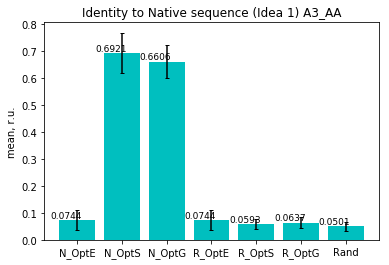

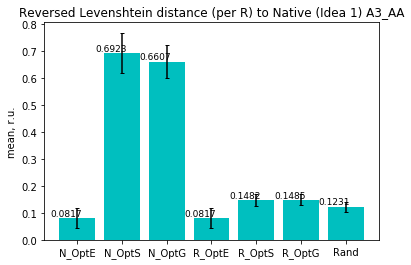

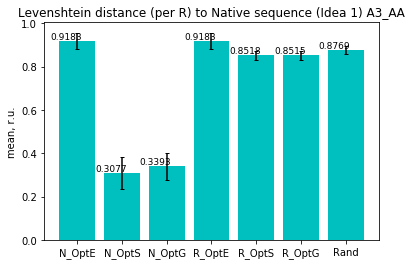

In [21]:
model = 'A3_AA'
c = 'c'
os.chdir(path)

file = 'Identity_LevDist_toNative_'+model+'.xlsx'
# Load data from excel
xf = pd.ExcelFile(file)    
dfIde = xf.parse('Identity')
dfLev = xf.parse('LevDist')

ide = plotIdentity(dfIde, c)
rlev = plotReverseLev(dfLev, c)
lev = plotLevenstein(dfLev, c)

os.chdir(path) 
ide.savefig(model+'_identity_toNat_Set45_count'+str(numprots)+'.png', dpi=1500)
rlev.savefig(model+'_revLev_toNat_Set45_count'+str(numprots)+'.png', dpi=1500)
lev.savefig(model+'_levDist_toNat_Set45_count'+str(numprots)+'.png', dpi=1500)

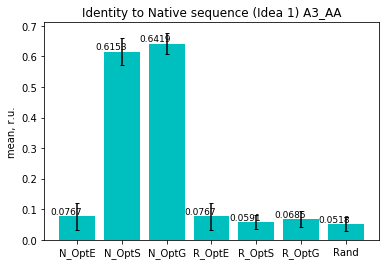

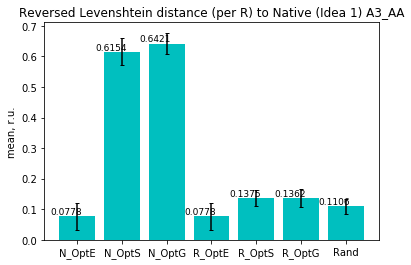

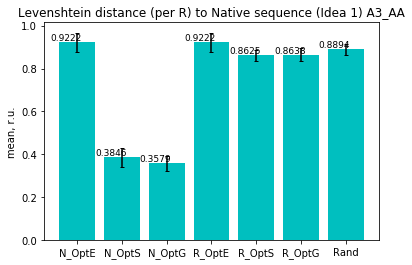

In [16]:
model = 'A3_AA'
c = 'c'
os.chdir(path)

file = 'Identity_LevDist_toNative_'+model+'_control.xlsx'
# Load data from excel
xf = pd.ExcelFile(file)    
dfIde = xf.parse('Identity')
dfLev = xf.parse('LevDist')

ide = plotIdentity(dfIde, c)
rlev = plotReverseLev(dfLev, c)
lev = plotLevenstein(dfLev, c)

os.chdir(path) 
ide.savefig(model+'_identity_toNat_control_count'+str(numprots)+'.png', dpi=1500)
rlev.savefig(model+'_revLev_toNat_control_count'+str(numprots)+'.png', dpi=1500)
lev.savefig(model+'_levDist_toNat_control_count'+str(numprots)+'.png', dpi=1500)

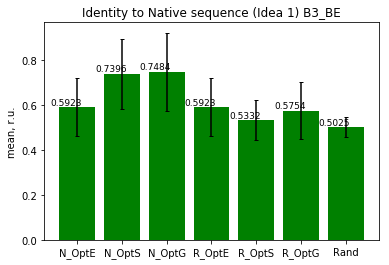

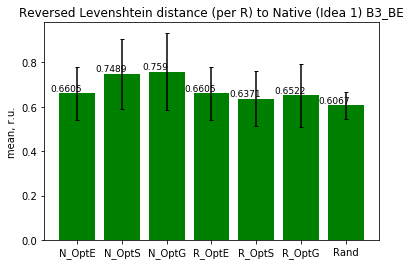

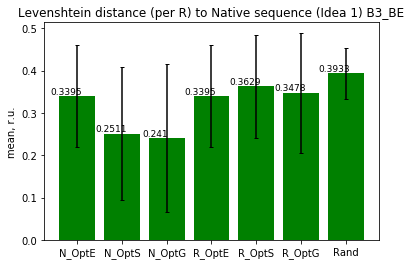

In [24]:
model = 'B3_BE'
c = 'g'
os.chdir(path)

file = 'Identity_LevDist_toNative_'+model+'.xlsx'
# Load data from excel
xf = pd.ExcelFile(file)    
dfIde = xf.parse('Identity')
dfLev = xf.parse('LevDist')

ide = plotIdentity(dfIde, c)
rlev = plotReverseLev(dfLev, c)
lev = plotLevenstein(dfLev, c)

os.chdir(path) 
ide.savefig(model+'_identity_toNat_Set45_count'+str(numprots)+'.png', dpi=1500)
rlev.savefig(model+'_revLev_toNat_Set45_count'+str(numprots)+'.png', dpi=1500)
lev.savefig(model+'_levDist_toNat_Set45_count'+str(numprots)+'.png', dpi=1500)

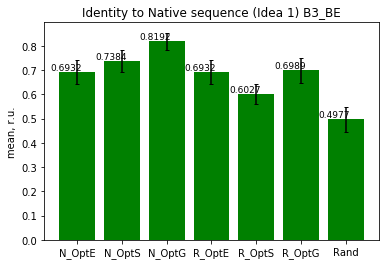

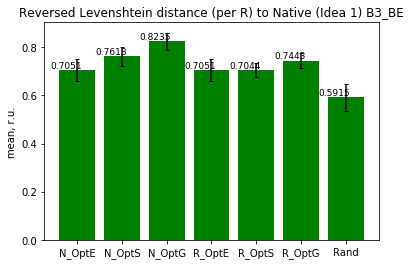

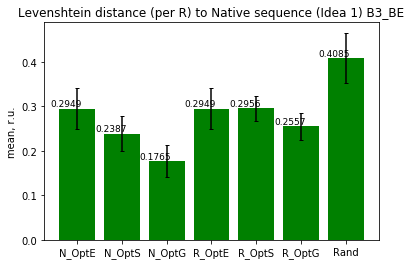

In [14]:
model = 'B3_BE'
c = 'g'
os.chdir(path)

file = 'Identity_LevDist_toNative_'+model+'_control.xlsx'
# Load data from excel
xf = pd.ExcelFile(file)    
dfIde = xf.parse('Identity')
dfLev = xf.parse('LevDist')

ide = plotIdentity(dfIde, c)
rlev = plotReverseLev(dfLev, c)
lev = plotLevenstein(dfLev, c)

os.chdir(path) 
ide.savefig(model+'_identity_toNat_control_count'+str(numprots)+'.png', dpi=1500)
rlev.savefig(model+'_revLev_toNat_control_count'+str(numprots)+'.png', dpi=1500)
lev.savefig(model+'_levDist_toNat_control_count'+str(numprots)+'.png', dpi=1500)

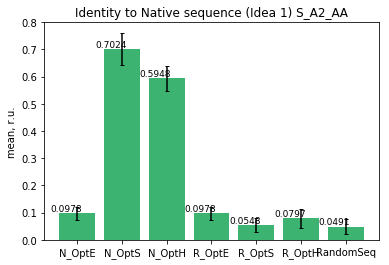

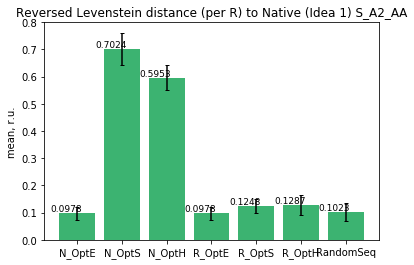

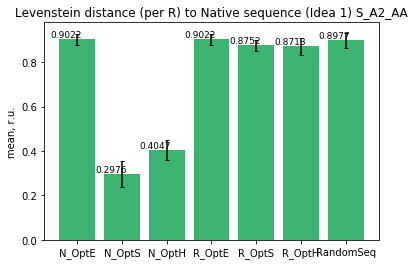

In [22]:
model = 'S_A2_AA'
c = 'mediumseagreen'
os.chdir(path)

file = 'Identity_LevDist_toNative_'+model+'_control.xlsx'
# Load data from excel
xf = pd.ExcelFile(file)    
dfIde = xf.parse('Identity')
dfLev = xf.parse('LevDist')

ide = plotIdentity(dfIde, c)
rlev = plotReverseLev(dfLev, c)
lev = plotLevenstein(dfLev, c)

os.chdir(path) 
ide.savefig(model+'_identity_toNat_control_count'+str(numprots)+'.png', dpi=1500)
rlev.savefig(model+'_revLev_toNat_control_count'+str(numprots)+'.png', dpi=1500)
lev.savefig(model+'_levDist_toNat_control_count'+str(numprots)+'.png', dpi=1500)